3. Mini NLP Application (Fake News Detection System)

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
fake = pd.read_csv("News _dataset\Fake.csv")
true = pd.read_csv("News _dataset\True.csv")
fake["label"] = 0   
true["label"] = 1   
df = pd.concat([fake, true], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [7]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    text = re.sub(r"\d+", "", text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)

In [8]:
X = df["clean_text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
tfidf = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [10]:
#Logistic
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)


In [11]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)


In [12]:
print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy: 0.9869710467706013

Confusion Matrix:
 [[4632   78]
 [  39 4231]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.99      4270

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [13]:
print("Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Results
Accuracy: 0.9457683741648107

Confusion Matrix:
 [[4414  296]
 [ 191 4079]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      4710
           1       0.93      0.96      0.94      4270

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



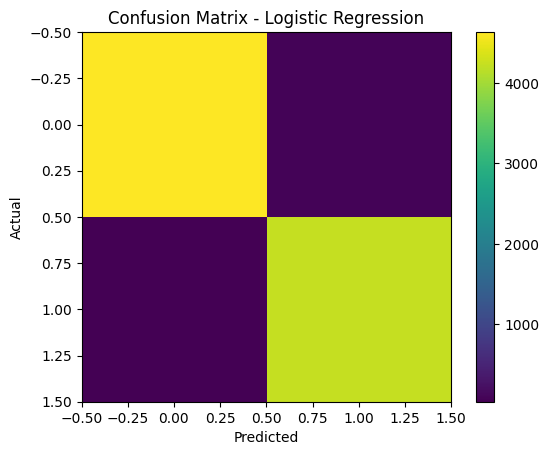

In [14]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()


In [ ]:
feature_names = tfidf.get_feature_names_out()
coefficients = lr.coef_[0]
top_real = np.argsort(coefficients)[-15:]
top_fake = np.argsort(coefficients)[:15]

print("Top Words for Real News:")
print([feature_names[i] for i in top_real])

print("\nTop Words for Fake News:")
print([feature_names[i] for i in top_fake])


Top Words for Real News:
['republican', 'he', 'us', 'monday', 'edt', 'friday', 'thursday', 'wednesday', 'tuesday', 'washington', 'the', 'we', 'it', 'said', 'reuters']

Top Words for Fake News:
['via', 'image', 'gop', 'mr', 'hillary', 'even', 'wire', 'like', 'american', 'america', 'obama', 'rep', 'know', 'images', 'sen']
